In [1]:
# importing libraries

import os
import pandas as pd
import numpy as np
from math import sqrt
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler

import warnings
warnings.filterwarnings('ignore')

#All necessary plotly libraries
import plotly as plotly
import plotly.io as plotly
import plotly.graph_objects as go
import plotly.express as px
from plotly.subplots import make_subplots
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import matplotlib.pyplot as plt

# stats tools
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Arima Model
from pmdarima.arima import auto_arima

# metrics
from sklearn.metrics import mean_squared_error, mean_absolute_error
import math

# LSTM

from tensorflow import keras
from tensorflow.keras.layers import Dense,LSTM,Dropout,Flatten
from tensorflow.keras import Sequential

# GARCH

from arch import arch_model

In [2]:
df = pd.read_csv("Netflix Stock.csv")
df.head()

Date      Open      High       Low     Close  \
0  2010-01-04 00:00:00-05:00  7.931429  7.961429  7.565714  7.640000   
1  2010-01-05 00:00:00-05:00  7.652857  7.657143  7.258571  7.358571   
2  2010-01-06 00:00:00-05:00  7.361429  7.672857  7.197143  7.617143   
3  2010-01-07 00:00:00-05:00  7.731429  7.757143  7.462857  7.485714   
4  2010-01-08 00:00:00-05:00  7.498571  7.742857  7.465714  7.614286   

     Volume  Dividends  Stock Splits  
0  17239600        0.0           0.0  
1  23753100        0.0           0.0  
2  23290400        0.0           0.0  
3   9955400        0.0           0.0  
4   8180900        0.0           0.0

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3522 entries, 0 to 3521
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Date          3522 non-null   object 
 1   Open          3522 non-null   float64
 2   High          3522 non-null   float64
 3   Low           3522 non-null   float64
 4   Close         3522 non-null   float64
 5   Volume        3522 non-null   int64  
 6   Dividends     3522 non-null   float64
 7   Stock Splits  3522 non-null   float64
dtypes: float64(6), int64(1), object(1)
memory usage: 220.3+ KB


In [4]:
df['Date'] = pd.to_datetime(df['Date'], utc=True)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3522 entries, 0 to 3521
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype              
---  ------        --------------  -----              
 0   Date          3522 non-null   datetime64[ns, UTC]
 1   Open          3522 non-null   float64            
 2   High          3522 non-null   float64            
 3   Low           3522 non-null   float64            
 4   Close         3522 non-null   float64            
 5   Volume        3522 non-null   int64              
 6   Dividends     3522 non-null   float64            
 7   Stock Splits  3522 non-null   float64            
dtypes: datetime64[ns, UTC](1), float64(6), int64(1)
memory usage: 220.3 KB


In [6]:
df = df.set_index(df['Date']).sort_index()

In [7]:
df.sample(5)

Date        Open        High  \
Date                                                                          
2022-09-27 04:00:00+00:00 2022-09-27 04:00:00+00:00  228.630005  230.639999   
2020-11-13 05:00:00+00:00 2020-11-13 05:00:00+00:00  486.769989  488.940002   
2013-03-28 04:00:00+00:00 2013-03-28 04:00:00+00:00   27.250000   27.557142   
2015-10-29 04:00:00+00:00 2015-10-29 04:00:00+00:00  105.000000  106.910004   
2010-01-05 05:00:00+00:00 2010-01-05 05:00:00+00:00    7.652857    7.657143   

                                  Low       Close    Volume  Dividends  \
Date                                                                     
2022-09-27 04:00:00+00:00  220.720001  224.360001   7762200        0.0   
2020-11-13 05:00:00+00:00  477.799988  482.839996   3002700        0.0   
2013-03-28 04:00:00+00:00   26.942858   27.040001  19588100        0.0   
2015-10-29 04:00:00+00:00  104.750000  105.120003   9841400        0.0   
2010-01-05 05:00:00+00:00    7.258571    7.358571  23753100        0.0   

                           Stock Splits  
Date                                     
2022-09-27 04:00:00+00:00           0.0  
2020-11-13 05:00:00+00:00           0.0  
2013-03-28 04:00:00+00:00           0.0  
2015-10-29 04:00:00+00:00           0.0  
2010-01-05 05:00:00+00:00           0.0

In [8]:
change = df["Close"].diff()
change.dropna(inplace=True)

In [9]:
change_up = change.copy()
change_down = change.copy()

change_up[change_up<0] = 0
change_down[change_down>0] = 0

change.equals(change_up+change_down)

avg_up = change_up.rolling(14).mean()
avg_down = change_down.rolling(14).mean().abs()

In [10]:
rsi = 100 * avg_up / (avg_up + avg_down)
rsi.head()

Date
2010-01-05 05:00:00+00:00   NaN
2010-01-06 05:00:00+00:00   NaN
2010-01-07 05:00:00+00:00   NaN
2010-01-08 05:00:00+00:00   NaN
2010-01-11 05:00:00+00:00   NaN
Name: Close, dtype: float64

In [11]:
plt.style.use('fivethirtyeight')
plt.rcParams['figure.figsize'] = (20, 20)

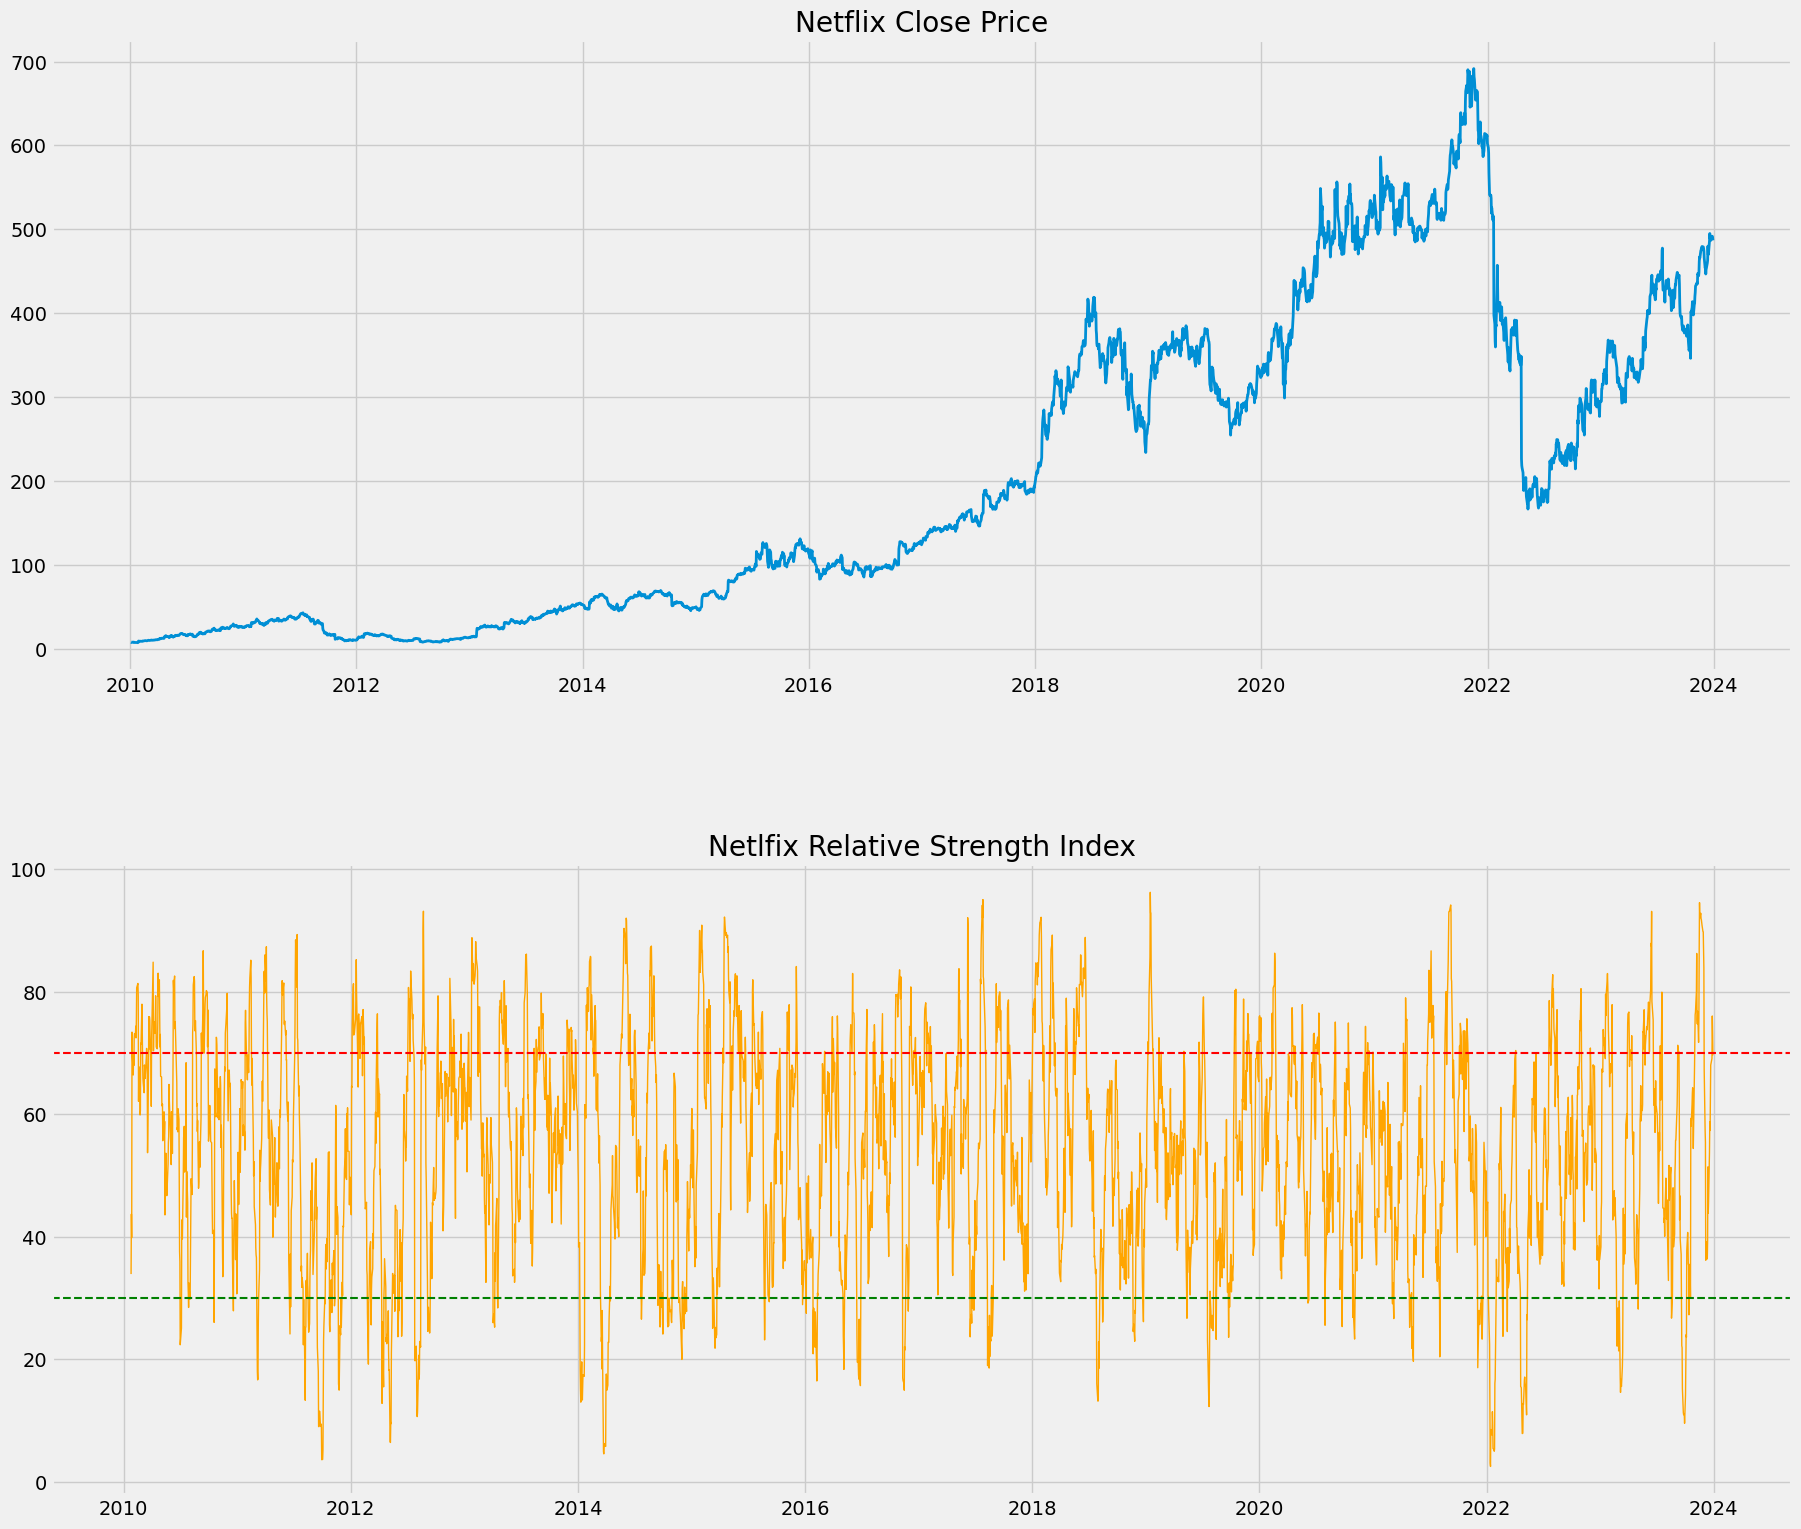

In [12]:
ax1 = plt.subplot2grid((10,1), (0,0), rowspan = 4, colspan = 1)
ax2 = plt.subplot2grid((10,1), (5,0), rowspan = 4, colspan = 1)

ax1.plot(df["Close"], linewidth=2)
ax1.set_title("Netflix Close Price")

ax2.set_title("Netlfix Relative Strength Index")
ax2.plot(rsi, color='orange', linewidth=1)

ax2.axhline(30, linestyle='--', linewidth=1.5, color='green')
ax2.axhline(70, linestyle='--', linewidth=1.5, color='red')

plt.show()

In [13]:
rsi = rsi.to_frame().reset_index()

In [14]:
rsi.head()

Date  Close
0 2010-01-05 05:00:00+00:00    NaN
1 2010-01-06 05:00:00+00:00    NaN
2 2010-01-07 05:00:00+00:00    NaN
3 2010-01-08 05:00:00+00:00    NaN
4 2010-01-11 05:00:00+00:00    NaN

In [15]:
rsi = rsi.set_index(rsi['Date']).sort_index()

In [16]:
rsi.sample(5)

Date      Close
Date                                                          
2023-12-20 05:00:00+00:00 2023-12-20 05:00:00+00:00  57.350108
2016-05-02 04:00:00+00:00 2016-05-02 04:00:00+00:00  30.623076
2010-02-22 05:00:00+00:00 2010-02-22 05:00:00+00:00  66.879003
2021-07-09 04:00:00+00:00 2021-07-09 04:00:00+00:00  73.445214
2021-11-15 05:00:00+00:00 2021-11-15 05:00:00+00:00  53.441576

In [17]:
rsi.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3521 entries, 2010-01-05 05:00:00+00:00 to 2023-12-29 05:00:00+00:00
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype              
---  ------  --------------  -----              
 0   Date    3521 non-null   datetime64[ns, UTC]
 1   Close   3508 non-null   float64            
dtypes: datetime64[ns, UTC](1), float64(1)
memory usage: 82.5 KB


In [18]:
nan_count = rsi.isna().sum()

In [19]:
print(nan_count)

Date      0
Close    13
dtype: int64


In [20]:
rsi = rsi.dropna()

In [21]:
rsi.head()

Date      Close
Date                                                          
2010-01-25 05:00:00+00:00 2010-01-25 05:00:00+00:00  33.924617
2010-01-26 05:00:00+00:00 2010-01-26 05:00:00+00:00  43.699526
2010-01-27 05:00:00+00:00 2010-01-27 05:00:00+00:00  39.861958
2010-01-28 05:00:00+00:00 2010-01-28 05:00:00+00:00  73.394899
2010-01-29 05:00:00+00:00 2010-01-29 05:00:00+00:00  69.774617

<Axes: xlabel='Date'>

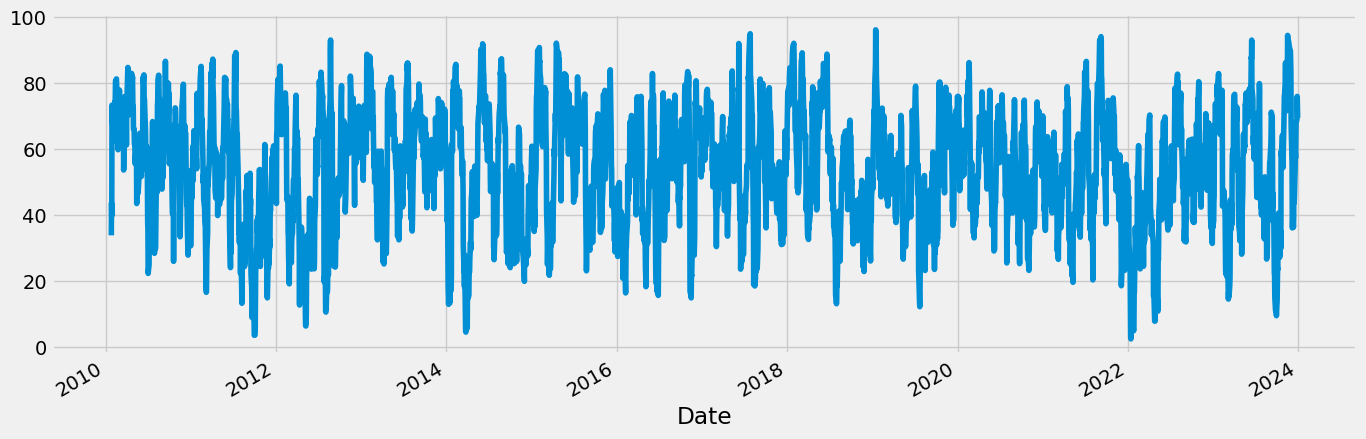

In [22]:
rsi["Close"].plot(figsize=(15,5))

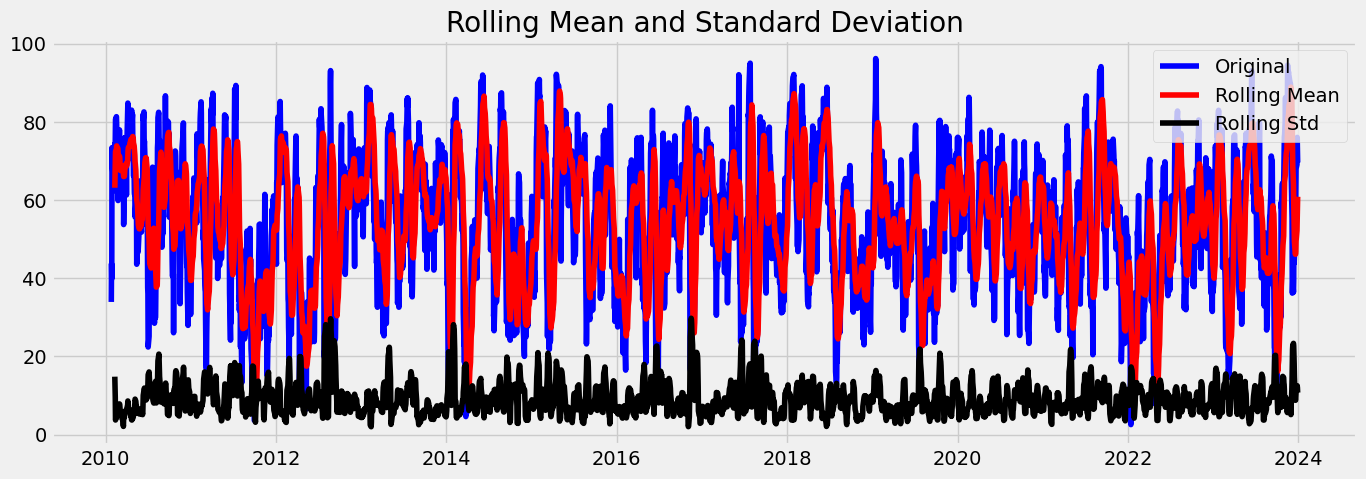

In [23]:
def test_stationarity(timeseries):
    
    rolmean = timeseries.rolling(12).mean()
    rolstd = timeseries.rolling(12).std()
    
    plt.figure(figsize=(15,5))
    plt.plot(timeseries,color='blue',label='Original')
    plt.plot(rolmean,color='red',label='Rolling Mean')
    plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean and Standard Deviation')
    plt.show(block=False)
    
test_stationarity(rsi["Close"])

In [24]:
adft = adfuller(rsi["Close"].dropna(),autolag='AIC')
output = pd.Series(adft[0:4],index=['Test Statistics','p-value','No. of lags used','Number of observations used'])
print(output)

Test Statistics               -7.874214e+00
p-value                        4.893007e-12
No. of lags used               2.800000e+01
Number of observations used    3.479000e+03
dtype: float64


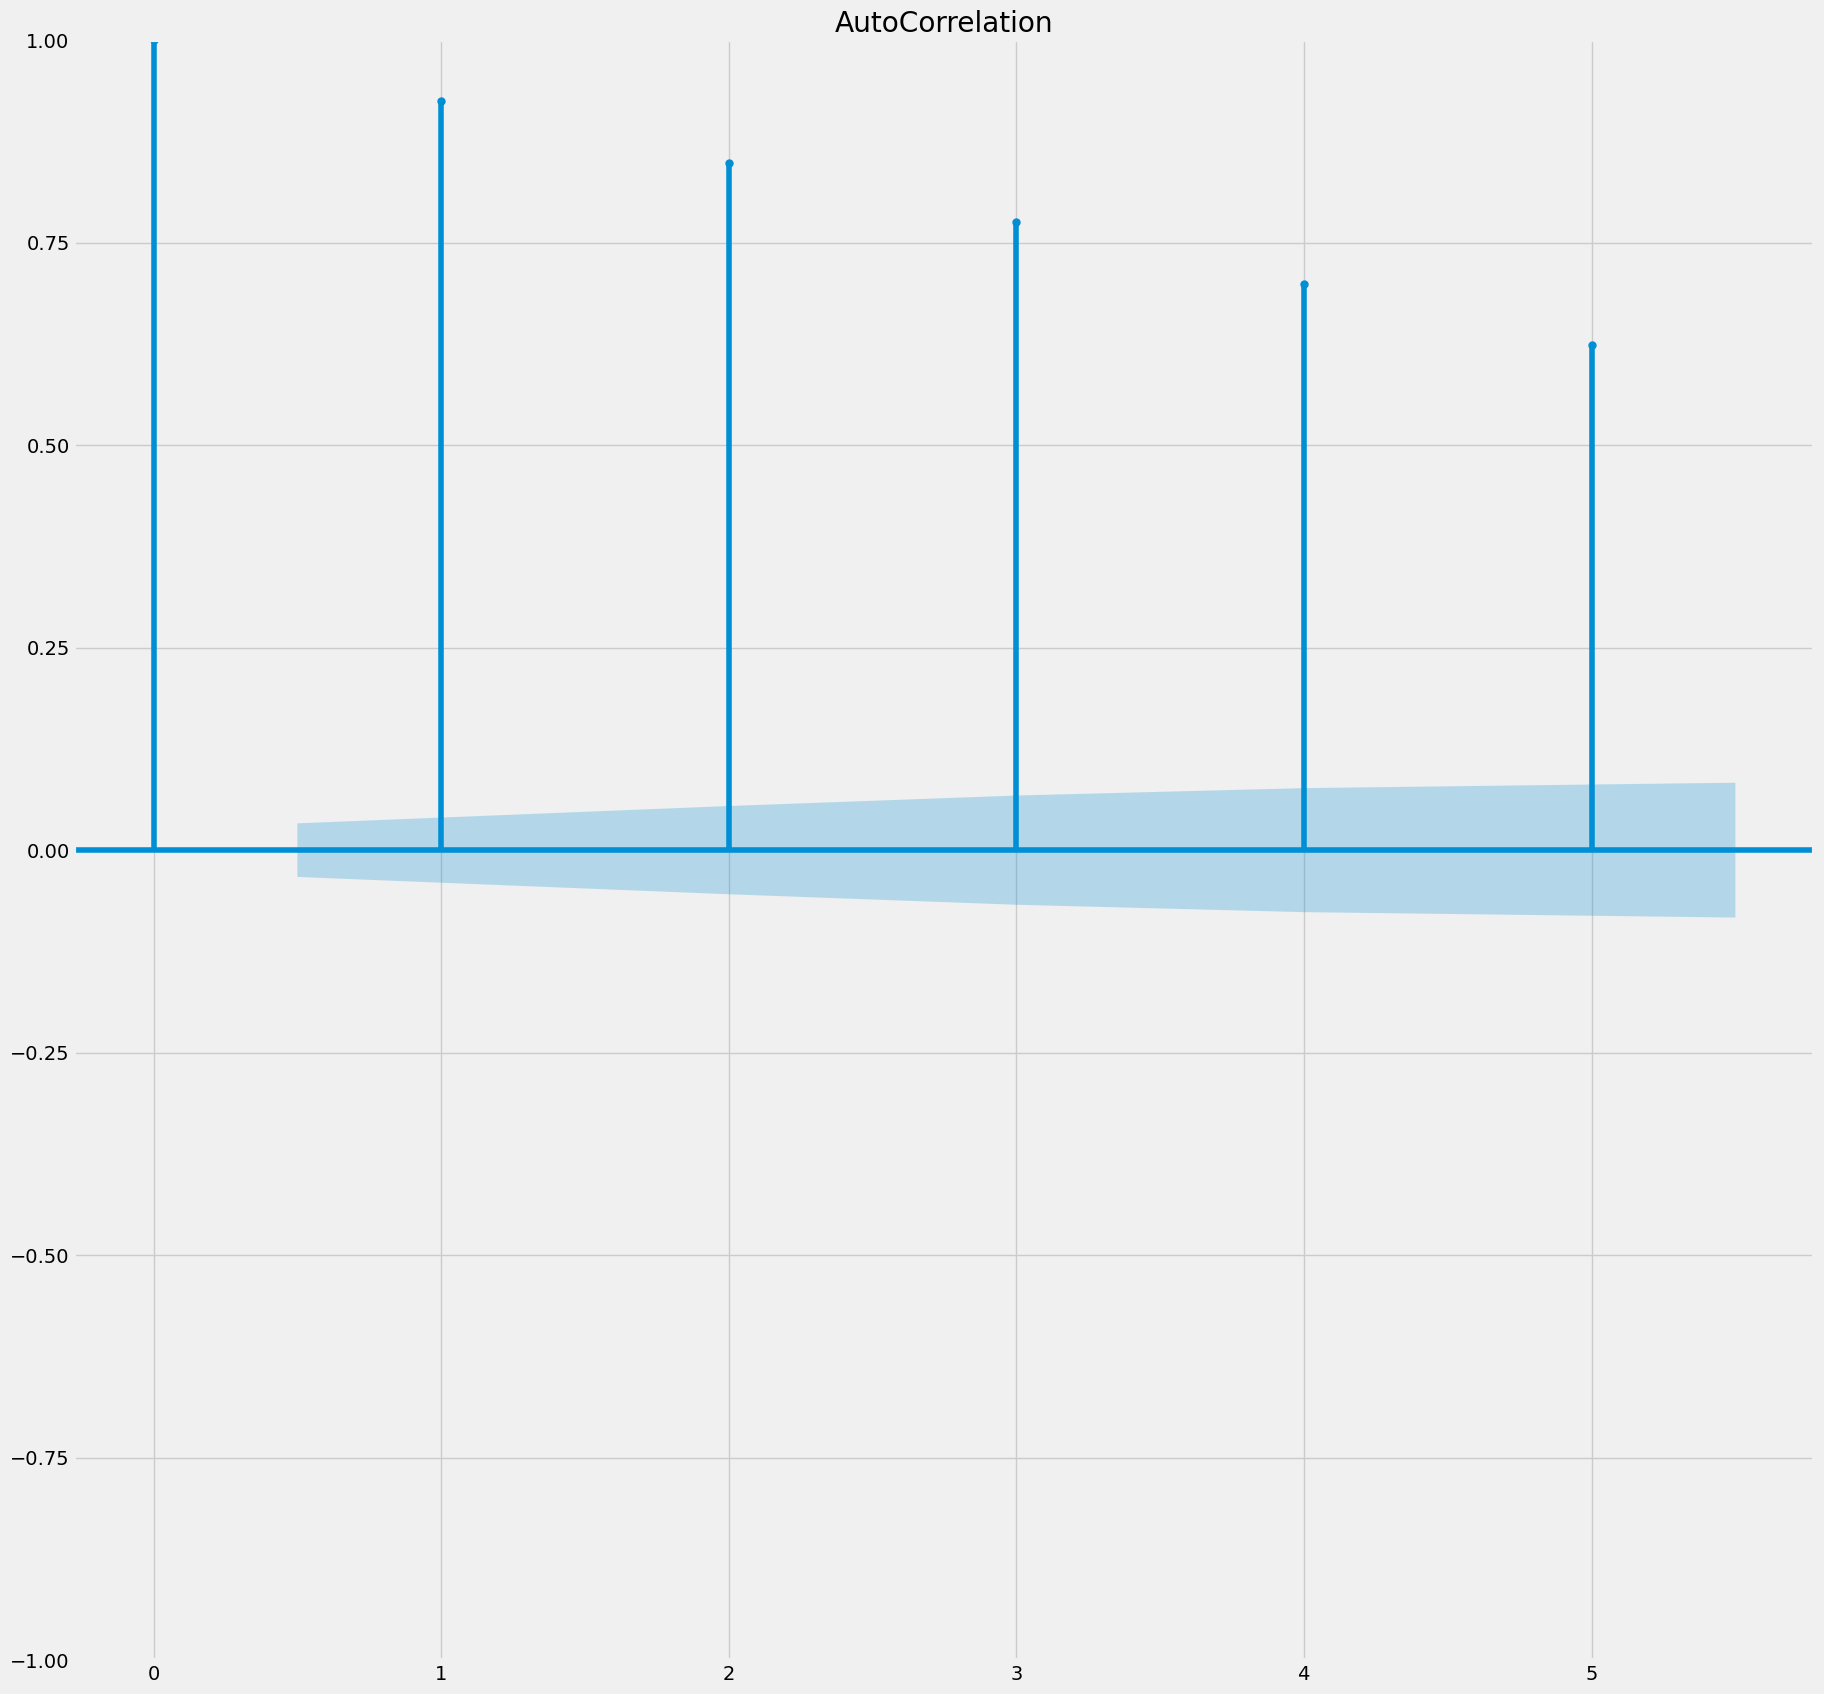

In [25]:
plot_acf(rsi["Close"].dropna(),lags=5,title="AutoCorrelation")
plt.show()

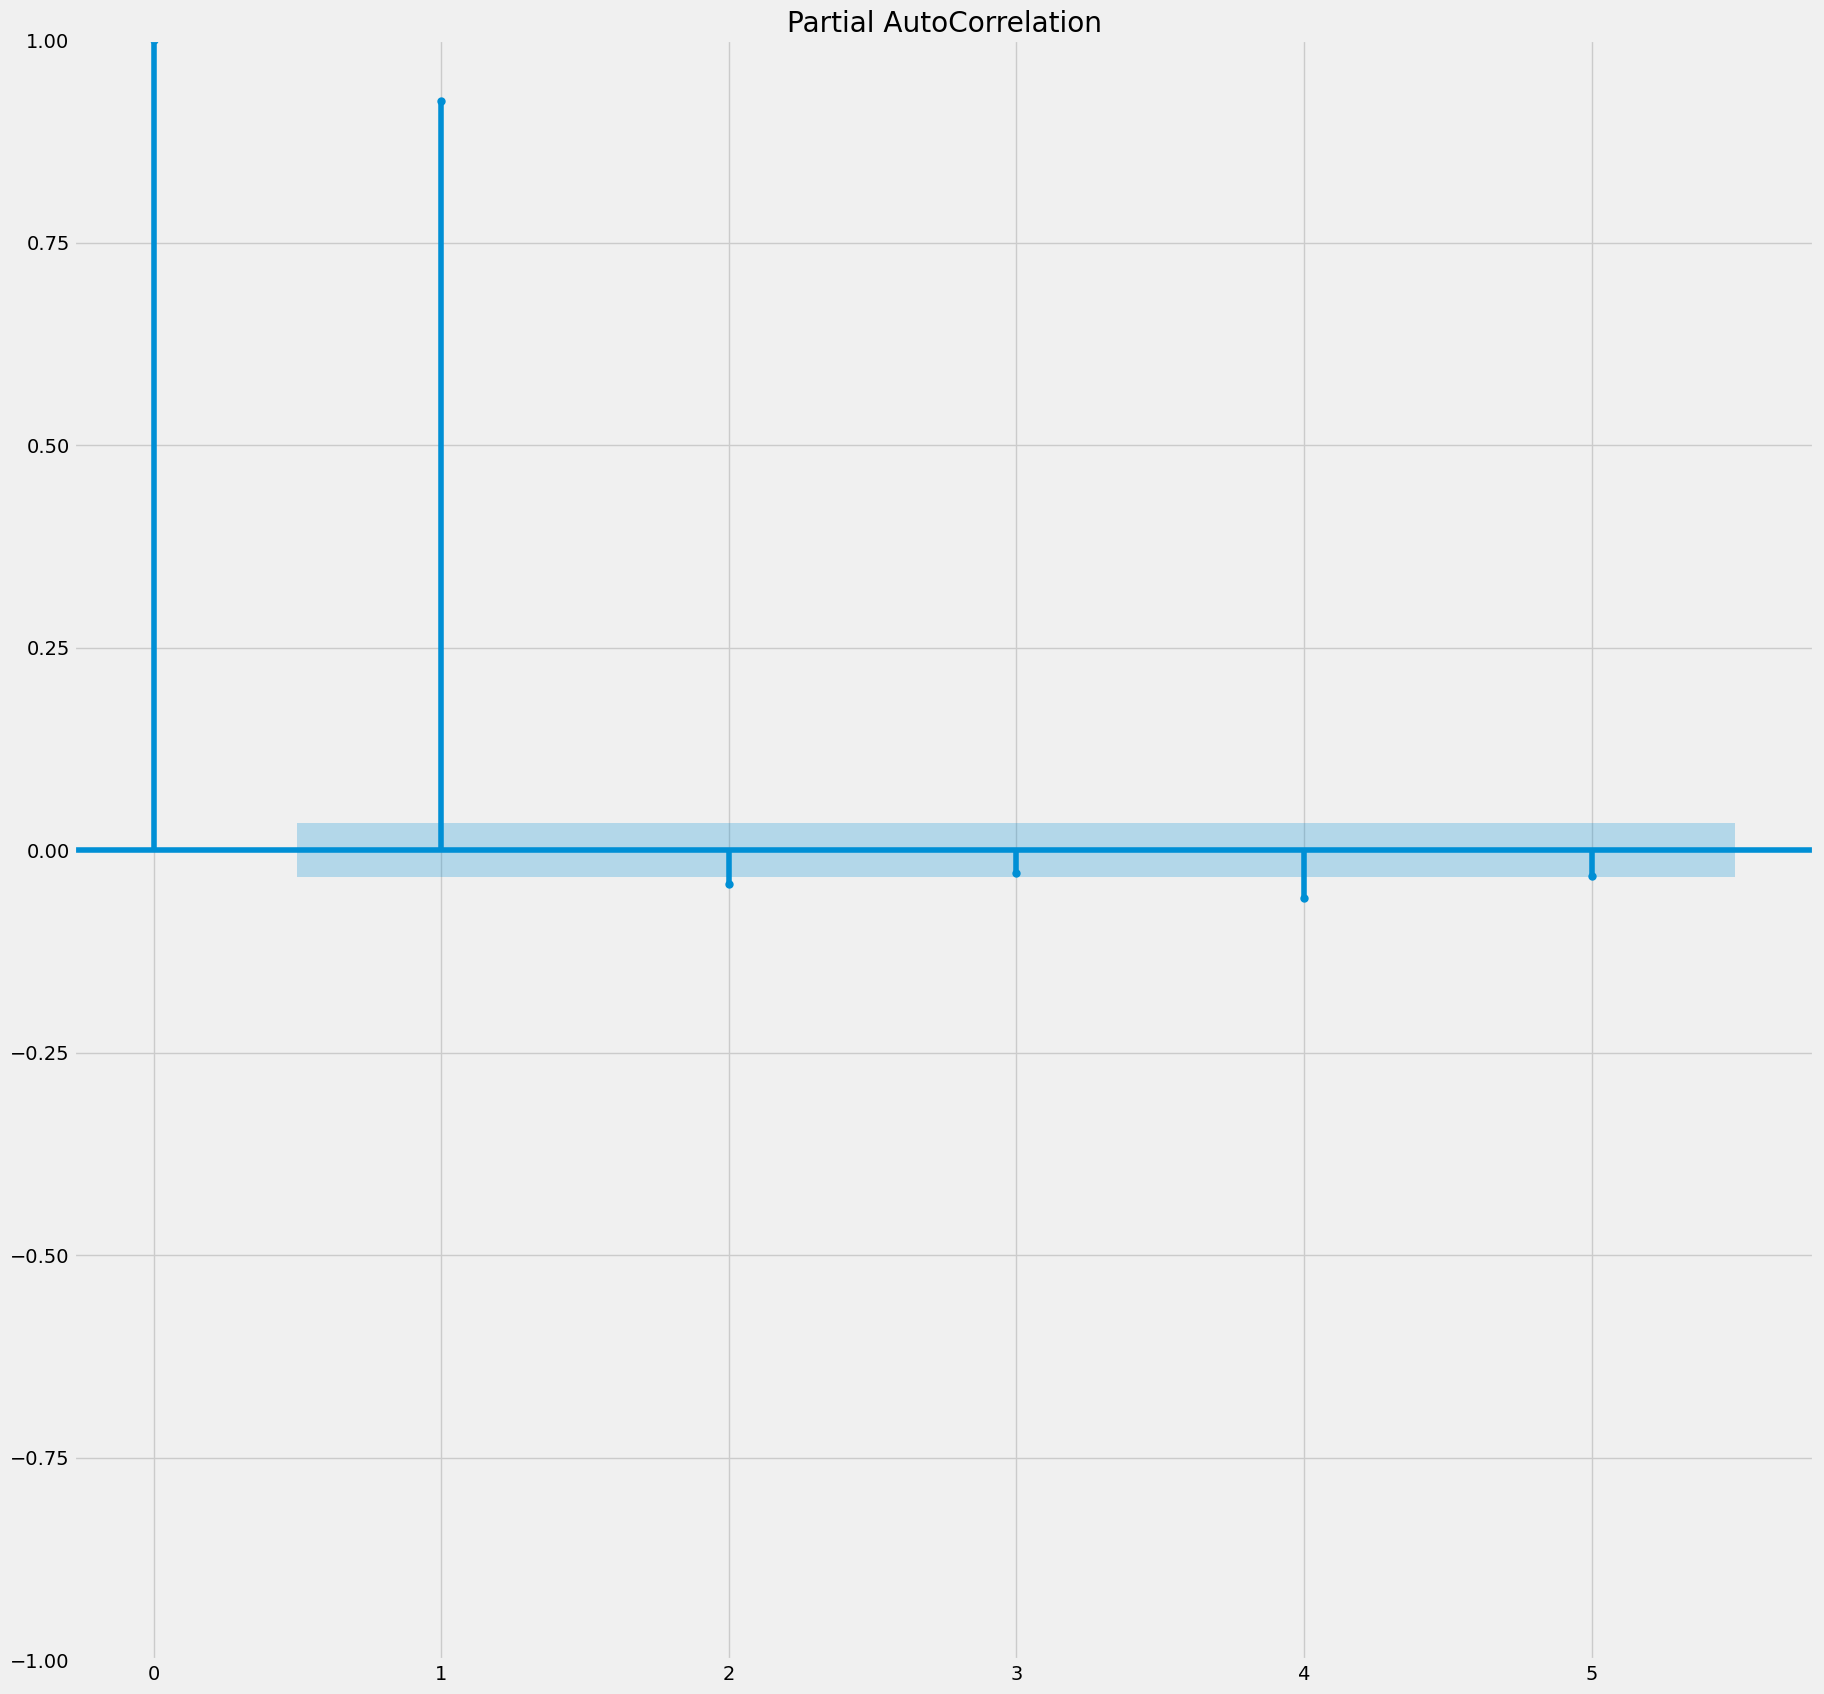

In [26]:
plot_pacf(rsi["Close"].dropna(),lags=5,title="Partial AutoCorrelation")
plt.show()

### Splitting the Data

*     **train**: Data from 2010 to 31st December, 2020.
*     **valid**: Data from 1st January, 2021 to 2023.

In [27]:
df_train = rsi[rsi.Date < "2021"]
df_valid = rsi[rsi.Date >= "2021"]
print(df_train.shape)
print(df_valid.shape)

(2755, 2)
(753, 2)


## RSI ARIMA Model

In [28]:
train = df_train['Close'].values
test = df_valid['Close'].values

In [29]:
history = [x for x in train]
predictions = list()

for t in range(len(df_valid)):
    model = ARIMA(history, order=(1,1,0))
    model_fit = model.fit()
    output = model_fit.forecast()
    yhat = output[0]
    predictions.append(yhat)
    obs = test[t]
    history.append(obs)
    print('predicted=%f, expected=%f' % (yhat, obs))

predicted=70.122153, expected=58.600456
predicted=58.651119, expected=49.165294
predicted=49.199288, expected=41.591820
predicted=41.615184, expected=43.249194
predicted=43.243933, expected=39.910297
predicted=39.921029, expected=35.422674
predicted=35.436612, expected=35.625418
predicted=35.624787, expected=42.627524
predicted=42.605806, expected=44.620854
predicted=44.614874, expected=43.800897
predicted=43.803366, expected=43.201935
predicted=43.203737, expected=63.837761
predicted=63.773849, expected=63.767757
predicted=63.767974, expected=56.135153
predicted=56.158770, expected=58.940443
predicted=58.931335, expected=60.667050
predicted=60.661504, expected=55.397159
predicted=55.414429, expected=56.812653
predicted=56.807939, expected=54.936035
predicted=54.942320, expected=59.156351
predicted=59.141978, expected=62.121693
predicted=62.111862, expected=57.276831
predicted=57.293393, expected=61.485773
predicted=61.470772, expected=61.904340
predicted=61.902854, expected=60.446387


In [30]:
rmse_arima = sqrt(mean_squared_error(test, predictions))
print('Test RMSE: %.3f' % rmse_arima)

Test RMSE: 6.677


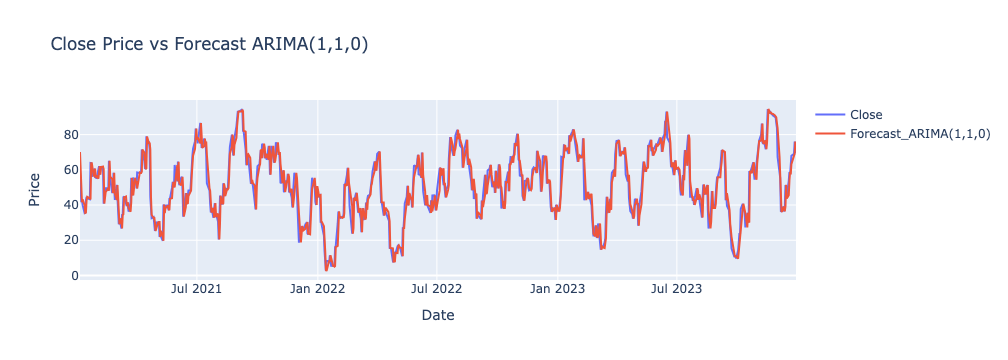

In [31]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=df_valid.Date,y=df_valid.Close,name='Close'))
fig.add_trace(go.Scatter(x=df_valid.Date,y=predictions,name='Forecast_ARIMA(1,1,0)'))
fig.update_layout(
    title='Close Price vs Forecast ARIMA(1,1,0)',
    xaxis_title='Date',
    yaxis_title='Price'
)
fig.show()

## RSI LTSM Model

In [32]:
training_values = np.reshape(train,(len(train),1))
scaler = MinMaxScaler()
training_values = scaler.fit_transform(training_values)
x_train = training_values[0:len(training_values)-1]
y_train = training_values[1:len(training_values)]
x_train = np.reshape(x_train,(len(x_train),1,1))

In [33]:
model = Sequential()
model.add(LSTM(128,return_sequences=True,input_shape=(None,1)))
model.add(LSTM(64,return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

model.compile(optimizer='adam',loss='mean_squared_error')

model.fit(x_train,y_train,epochs=25,batch_size=8)

Epoch 1/25
345/345 ━━━━━━━━━━━━━━━━━━━━ 1s 857us/step - loss: 0.0586
Epoch 2/25
345/345 ━━━━━━━━━━━━━━━━━━━━ 0s 785us/step - loss: 0.0060
Epoch 3/25
345/345 ━━━━━━━━━━━━━━━━━━━━ 0s 790us/step - loss: 0.0063
Epoch 4/25
345/345 ━━━━━━━━━━━━━━━━━━━━ 0s 786us/step - loss: 0.0065
Epoch 5/25
345/345 ━━━━━━━━━━━━━━━━━━━━ 0s 787us/step - loss: 0.0059
Epoch 6/25
345/345 ━━━━━━━━━━━━━━━━━━━━ 0s 790us/step - loss: 0.0062
Epoch 7/25
345/345 ━━━━━━━━━━━━━━━━━━━━ 0s 792us/step - loss: 0.0060
Epoch 8/25
345/345 ━━━━━━━━━━━━━━━━━━━━ 0s 787us/step - loss: 0.0058
Epoch 9/25
345/345 ━━━━━━━━━━━━━━━━━━━━ 0s 791us/step - loss: 0.0057
Epoch 10/25
345/345 ━━━━━━━━━━━━━━━━━━━━ 0s 790us/step - loss: 0.0064
Epoch 11/25
345/345 ━━━━━━━━━━━━━━━━━━━━ 0s 789us/step - loss: 0.0060
Epoch 12/25
345/345 ━━━━━━━━━━━━━━━━━━━━ 0s 784us/step - loss: 0.0058
Epoch 13/25
345/345 ━━━━━━━━━━━━━━━━━━━━ 0s 792us/step - loss: 0.0057
Epoch 14/25
345/345 ━━━━━━━━━━━━━━━━━━━━ 0s 799us/step - loss: 0.0059
Epoch 15/25
345/345 ━━━━━━━━━

In [34]:
test_values = np.reshape(test, (len(test), 1))
test_values = scaler.transform(test_values)
test_values = np.reshape(test_values, (len(test_values), 1, 1))
predicted_price = model.predict(test_values)
predicted_price = scaler.inverse_transform(predicted_price) 
predicted_price=np.squeeze(predicted_price)

24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step


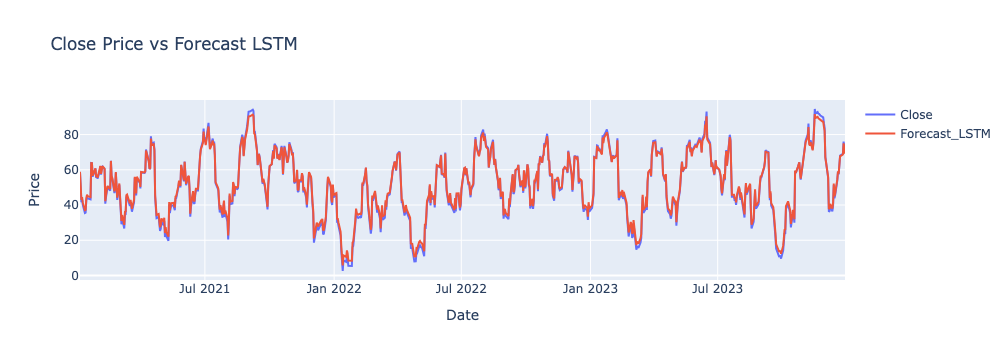

In [35]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=df_valid.Date,y=df_valid.Close,name='Close'))
fig.add_trace(go.Scatter(x=df_valid.Date,y=predicted_price,name='Forecast_LSTM'))
fig.update_layout(
    title='Close Price vs Forecast LSTM',
    xaxis_title='Date',
    yaxis_title='Price'
)
fig.show()

In [36]:
rmse_lstm = sqrt(mean_squared_error(test, predicted_price))
print('Test MSE: %.3f' % rmse_lstm)

Test MSE: 1.333


In [37]:
models = ['ARIMA','LSTM']
lst_acc = [rmse_arima,rmse_lstm]
MSE = pd.DataFrame({'Model': models, 'Root Mean Squared Error': lst_acc})
MSE.sort_values(by="Root Mean Squared Error")

Model  Root Mean Squared Error
1   LSTM                 1.333306
0  ARIMA                 6.677419

## Combined Models

### Simple Average

In [38]:
combined_predictions = (predictions + predicted_price.flatten()) / 2

In [39]:
rmse_simple = sqrt(mean_squared_error(df_valid.Close, combined_predictions))
print('Test MSE: %.3f' % rmse_simple)

Test MSE: 3.506


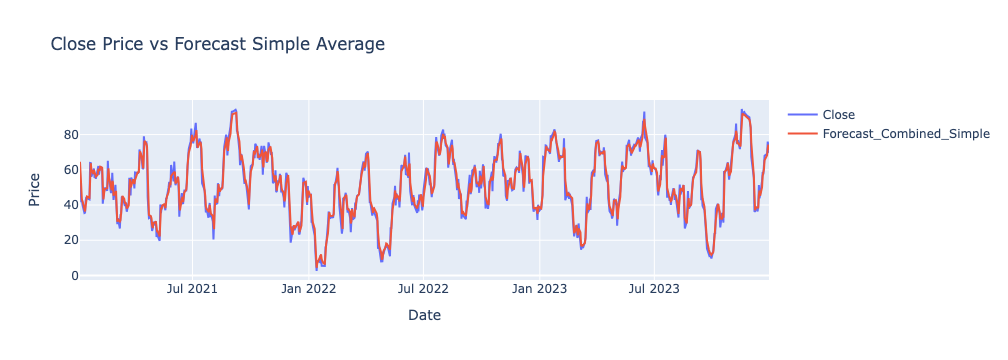

In [40]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=df_valid.Date,y=df_valid.Close,name='Close'))
fig.add_trace(go.Scatter(x=df_valid.Date,y=combined_predictions,name='Forecast_Combined_Simple'))
fig.update_layout(
    title='Close Price vs Forecast Simple Average',
    xaxis_title='Date',
    yaxis_title='Price'
)
fig.show()

### Weighted Average

In [41]:
weight_arima = 0.4
weight_lstm = 0.6

In [42]:
arima_predictions = np.array(predictions)

In [43]:
combined_predictions = (weight_arima * arima_predictions) + (weight_lstm * predicted_price.flatten())

In [44]:
rmse_weighted = sqrt(mean_squared_error(df_valid.Close, combined_predictions))
print('Test MSE: %.3f' % rmse_weighted)

Test MSE: 2.906


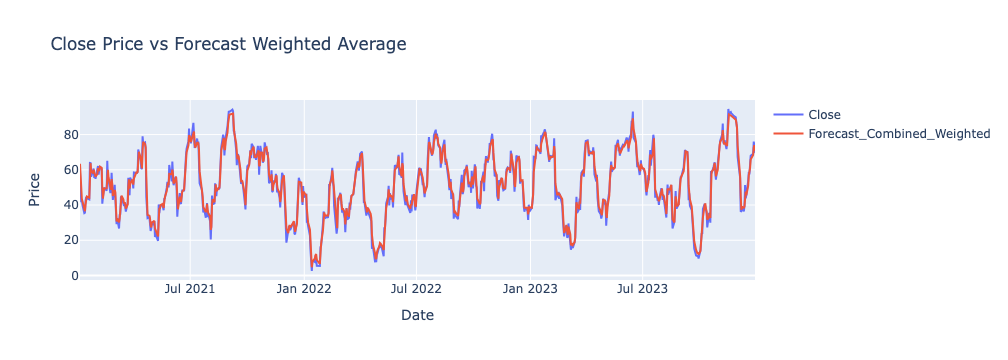

In [45]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=df_valid.Date,y=df_valid.Close,name='Close'))
fig.add_trace(go.Scatter(x=df_valid.Date,y=combined_predictions,name='Forecast_Combined_Weighted'))
fig.update_layout(
    title='Close Price vs Forecast Weighted Average',
    xaxis_title='Date',
    yaxis_title='Price'
)
fig.show()

In [46]:
models = ['ARIMA','LSTM', 'Simple', 'Weighted']
lst_acc = [rmse_arima,rmse_lstm, rmse_simple, rmse_weighted]
MSE = pd.DataFrame({'Model': models, 'Root Mean Squared Error': lst_acc})
MSE.sort_values(by="Root Mean Squared Error")

Model  Root Mean Squared Error
1      LSTM                 1.333306
3  Weighted                 2.906103
2    Simple                 3.505820
0     ARIMA                 6.677419